# Amazon sales Data Analysis (Electronics)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv("electronics.csv")

In [84]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [85]:
df.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [86]:
df.shape

(1292954, 10)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


### Among the ten columns
* dataframe, brand, user_attr are the one with null values
* user_id, item_id,year are int64 data types
* rating is float64 type
* timestamp, model_attr, category, brand, user_attr are object type
* if we see timestamp then we find out it is not in the right format

converting object type into corresponding right type



In [88]:
df['brand'] = df['brand'].astype(str)
df['category'] = df['category'].astype(str)
df['rating'] = df['rating'].astype(float)
df['user_id'] = df['user_id'].astype(str)
df['item_id'] = df['item_id'].astype(str)

In [89]:
from datetime import datetime
pd.to_datetime(df['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [90]:
# Statistical summary of the data
df.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


The statistical summary of the dataset gives the following information:
* The mean rating is 4.
* The minimum rating is 1.
* The maximum rating is 5.
* The standard deviation of the ratings is 1.1.
* The 25th percentile of the ratings is 4.
* The 50th percentile of the ratings is 5.
* The 75th percentile of the ratings is 5.

The statistical information provide us that average rating is 4 form which which we can also conclude that the people like most of the times since average is closed to maximum rating.

In [91]:
#lets handle the null and zero vaues
# droping spit  as it doesnot make any sense in the dataset 
df.drop('split', axis=1, inplace=True) 


In [92]:
df['brand']

0                 nan
1                 nan
2                 nan
3                 nan
4                 nan
              ...    
1292949    Etre Jeune
1292950           nan
1292951           nan
1292952           nan
1292953    Etre Jeune
Name: brand, Length: 1292954, dtype: object

In [93]:
#counting the unique values in a column of a data farme: 
df["brand"].value_counts(dropna=False)

brand
nan             961834
Bose             29222
Logitech         29203
Sony             20360
Mpow             17477
EldHus           16530
Sennheiser       13322
Fujifilm         12245
TaoTronics       12125
Etre Jeune       11753
Pyle             11606
JLAB             10079
Skullcandy       10014
Kodak             8701
Linksys           8288
Jabra             7417
Panasonic         7349
Fintie            7212
Garmin            7212
Samsung           7051
Canon             6959
Neewer            6697
Philips           6658
Nikon             6539
Apple             6027
Polaroid          5926
DBPOWER           4818
Uniden            4701
Olympus           3709
ViewSonic         3426
ebasy             2771
Plemo             2385
HP                2140
LSS               2040
Toshiba           2008
Savage            1749
Tiamat            1738
XShields          1709
JVC               1702
Generic           1606
Gary Fong         1203
iRULU              991
Archos             961
Funlu

In [94]:
#taking top ten high frequencies data and replacing it with the nan value in the brand columns:
list1 = ["Bose",           
"Logitech",      
"Sony",           
"Mpow",             
"EldHus",      
"Sennheiser",     
"Fujifilm",      
"TaoTronics",      
"Etre Jeune",      
"Pyle",    
"JLAB"  ,          
"Skullcandy"      
]
for i in range(0,10): 
    if (i != 9):
        df["brand"][129295*i:129295*(i+1)].replace( to_replace=['nan'], value=list1[i], inplace=True)
    else: 
        df["brand"][129295*i:1292955].replace( to_replace=['nan'], value=list1[i], inplace=True)

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_7916\1748788698.py:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_7916\1748788698.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [95]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  object 
 1   user_id     1292954 non-null  object 
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       1292954 non-null  object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 88.8+ MB


In [96]:
#lets fix the user_attr
df['user_attr'] = df['user_attr'].astype(str)
df["user_attr"].value_counts(dropna=False)

user_attr
nan       1118830
Male        87424
Female      86700
Name: count, dtype: int64




male and women are almost same so what we want to do this is to use fill half of the NaN values with male and female Just like we did with Dataset Brand and We can see that the attribute is not also string type so we change it into

In [97]:
for i in range(0,2): 
    print(i)
    if (i == 0 ):
        df["user_attr"][i:646477*(i+1)].replace( to_replace=['nan'],value="Female", inplace=True)
    else: 
        df["user_attr"][646477*i:1292954].replace( to_replace=['nan'],value="Male", inplace=True)

0
1


C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_7916\1995248040.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_7916\1995248040.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [98]:
df["user_attr"].value_counts(dropna=False)

user_attr
Female    647453
Male      645501
Name: count, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  object 
 1   user_id     1292954 non-null  object 
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       1292954 non-null  object 
 7   year        1292954 non-null  int64  
 8   user_attr   1292954 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 88.8+ MB


In [100]:
df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
dtype: int64

Now we can see perfectly clean dataset with no null values

## Start of Visualization

### Q1. Which product has the highest sales in which year?

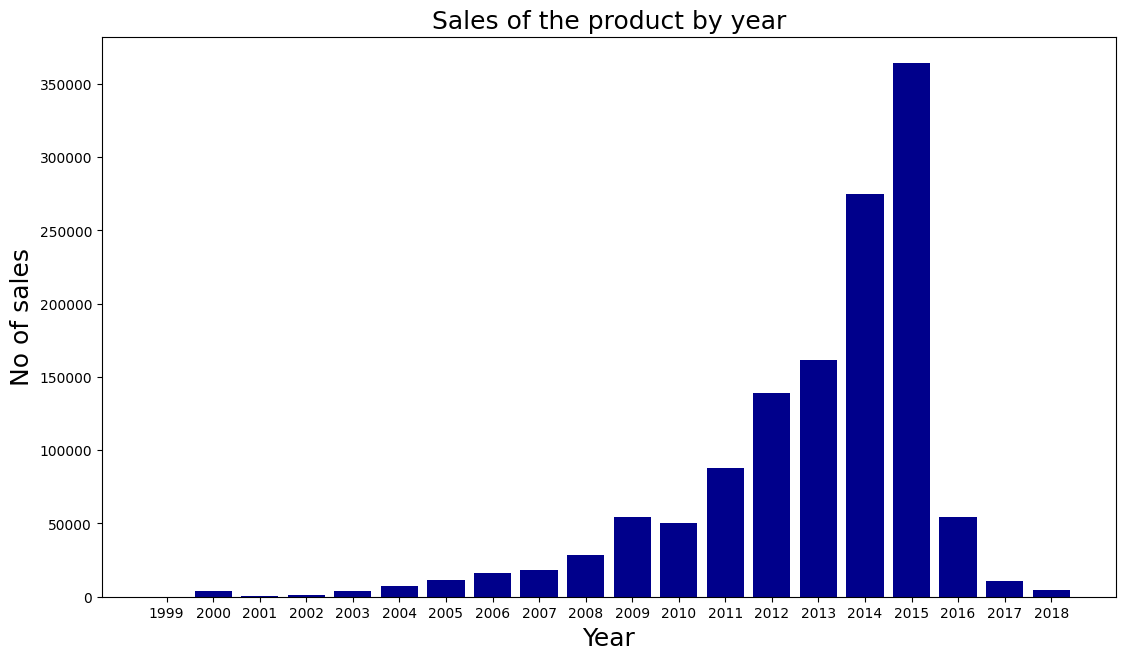

In [101]:

highest_sales_in_year =df.groupby('year')['category'].count().reset_index()

fig, ax = plt.subplots(figsize=(13,7))

bar_colors = [ 'Darkblue']

ax.bar(highest_sales_in_year.year.to_numpy(), highest_sales_in_year.category.to_numpy(), color=bar_colors)

ax.set_ylabel('No of sales' , fontsize=18)
ax.set_xlabel('Year' , fontsize=18)
ax.set_title('Sales of the product by year' , fontsize=18)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.xticks(highest_sales_in_year.year.to_list() , fontsize=10)
plt.subplots_adjust(left=0.2, right=0.98, top=0.9, bottom=0.1)


plt.show()

## Q2. Which product has the most sales ?

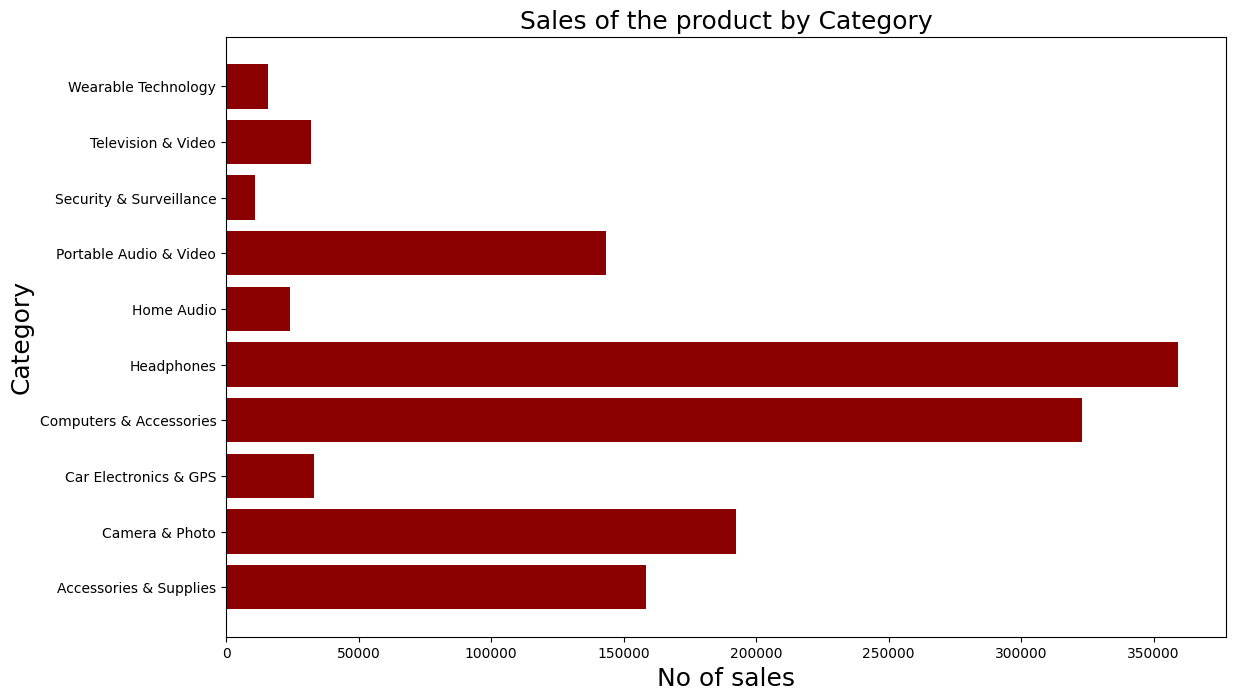

In [102]:
highest_productsales =df.groupby('category')['user_id'].count().reset_index()

fig1, ax1 = plt.subplots(figsize=(20,10))

bar_colors = [ 'Darkred']

ax1.barh(highest_productsales.category.to_numpy(), highest_productsales.user_id.to_numpy(), color=bar_colors)

ax1.set_ylabel('Category' , fontsize=18)
ax1.set_xlabel('No of sales' , fontsize=18)
ax1.set_title('Sales of the product by Category' , fontsize=18)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.xticks()
plt.subplots_adjust(left=0.4, right=0.9, top=0.9, bottom=0.3)


plt.show()

## which product has the highest sasles in which year and which product sales are increasing or decreasing?

In [120]:
highest_product_sale_based_on_year = df.groupby(['category','year'])['user_id'].count().reset_index()

In [121]:
highest_product_sale_based_on_year=highest_product_sale_based_on_year.rename(columns = {'user_id':'count'})

In [ ]:
highest_product_sale_based_on_year=highest_product_sale_based_on_year.rename(columns = {'user_id':'count'})

C:\Users\CHIRAG\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



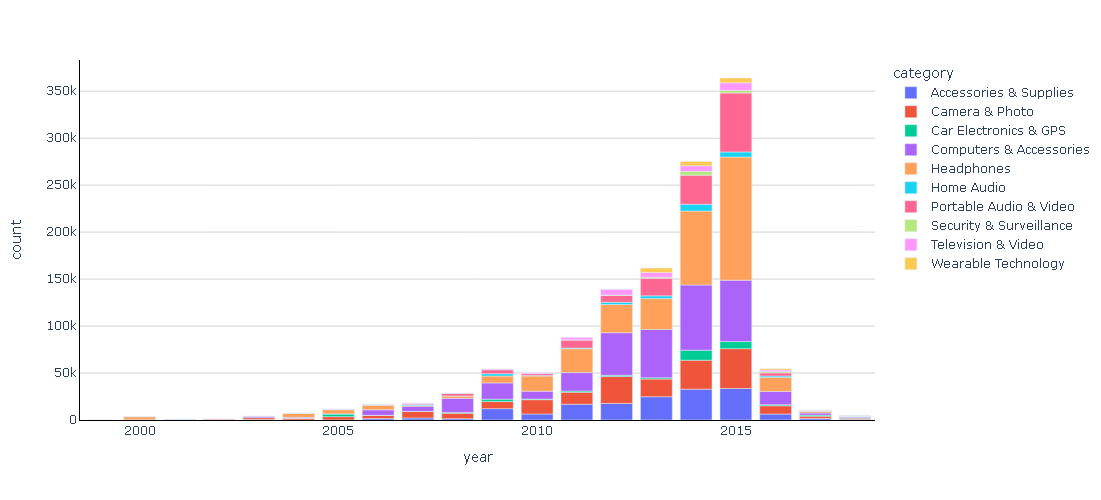

In [122]:
import plotly.express as px
df1 = highest_product_sale_based_on_year



fig = px.bar(df1, x="year", y="count", color="category", text_auto=False)
fig.update_layout(height=500,width=1000)
config={"modeBarButtonsToRemove": ['select2d','zoomIn2d','zoomOut2d','zoom2d','pan2d','lasso2d','autoScale2d','resetScale2d','resetScale2d'],'displaylogo': False}
fig.update_xaxes(showticklabels=True)
fig.update_xaxes(showline=True , linecolor='black' )
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True ,gridcolor='lightgrey')
fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)
fig.show(config = config)

## which product has the highest rating in which year?

In [123]:
highest_rating_in_year =df.groupby(['category','year'])['rating'].mean().reset_index()

In [124]:
highest_rating_in_year

,category,year,rating
0,Accessories & Supplies,2000,2.833333
1,Accessories & Supplies,2001,3.666667
2,Accessories & Supplies,2003,4.508321
3,Accessories & Supplies,2004,3.225000
4,Accessories & Supplies,2005,4.407407
...,...,...,...
150,Wearable Technology,2014,3.634420
151,Wearable Technology,2015,3.224581
152,Wearable Technology,2016,3.664702
153,Wearable Technology,2017,3.098765


In [129]:
df['month'] = pd.DatetimeIndex(df['timestamp']).month

In [130]:
df2 = df.groupby(['category','month','year'])['user_id'].count().reset_index()
df2.rename(columns = {'user_id':'count'}, inplace = True)

In [131]:
df2

,category,month,year,count
0,Accessories & Supplies,1,2000,1
1,Accessories & Supplies,1,2001,2
2,Accessories & Supplies,1,2003,63
3,Accessories & Supplies,1,2004,5
4,Accessories & Supplies,1,2005,3
...,...,...,...,...
1814,Wearable Technology,12,2014,615
1815,Wearable Technology,12,2015,382
1816,Wearable Technology,12,2016,127
1817,Wearable Technology,12,2017,10


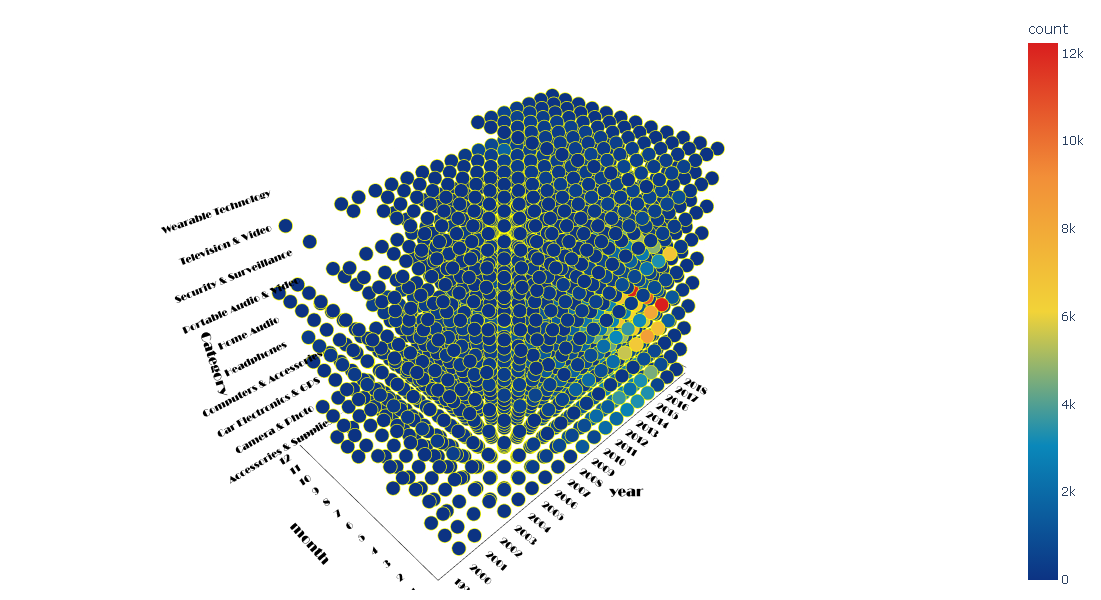

In [136]:
import plotly.express as px
fig = px.scatter_3d(df2, x='year', y='month', z='category', color='count',opacity = 1 , color_continuous_scale='Portland',)
fig.update_layout(height=600,width=600, )


fig.update_layout(scene = dict(
                    xaxis = dict(
                        title=dict(text='year', font=dict(size=14, family='san-serif', color='black')),
                        tickfont=dict(size=11, family='San-serif', color= "black"),
                        tickvals=df2["year"],
                         backgroundcolor="rgb(200, 200, 230)",
                         showbackground=False,
                         showline = True,
                         linecolor = "black",
                       
                         showgrid = False),
                    yaxis = dict(
                        title=dict(text='month', font=dict(size=14, family='san-serif', color='black')),
                        tickfont=dict(size=11, family='San-serif', color= "black"),
                         tickvals=df2["month"],
                        backgroundcolor="rgb(230, 200,230)",
                        showbackground=False,
                        showline = True,
                        linecolor = "black",
                        ),
                    zaxis = dict(
                        title=dict(text='Category', font=dict(size=14, family='san-serif', color='black')),
                        tickfont=dict(size=11, family='San-serif', color= "black"),
                        tickvals=df2["category"],
                        backgroundcolor="rgb(230, 230,200)",
                        showbackground=False,
                        showline = False,
                        linecolor = "black",
                        zerolinecolor="black",),),
                    width=700,
                    margin=dict(
                    r=10, l=10,
                    b=10, t=10)
                  )
fig.update_traces(marker=dict(size=5,
                              line=dict(width=0.5,
                         color = "yellow")),
              selector=dict(mode='markers')) 

fig.update_layout(scene=dict(
    camera=dict(
        up=dict(x=0, y=0, z=1.5),  # Adjust the up vector to define the rotation axis
        center=dict(x=0, y=0, z=0),  # Adjust the center point of rotation
        eye=dict(x=-1.5, y=-1.5, z=1.5)  # Adjust the eye position to set the view angle
    )
))
config={"modeBarButtonsToRemove": ['select3d','zoomIn3d','zoomOut3d','zoom3d','pan3d','lasso2d','autoScale3d','resetScale3d','resetScale3d'],'displaylogo': False}


fig.show(config = config)

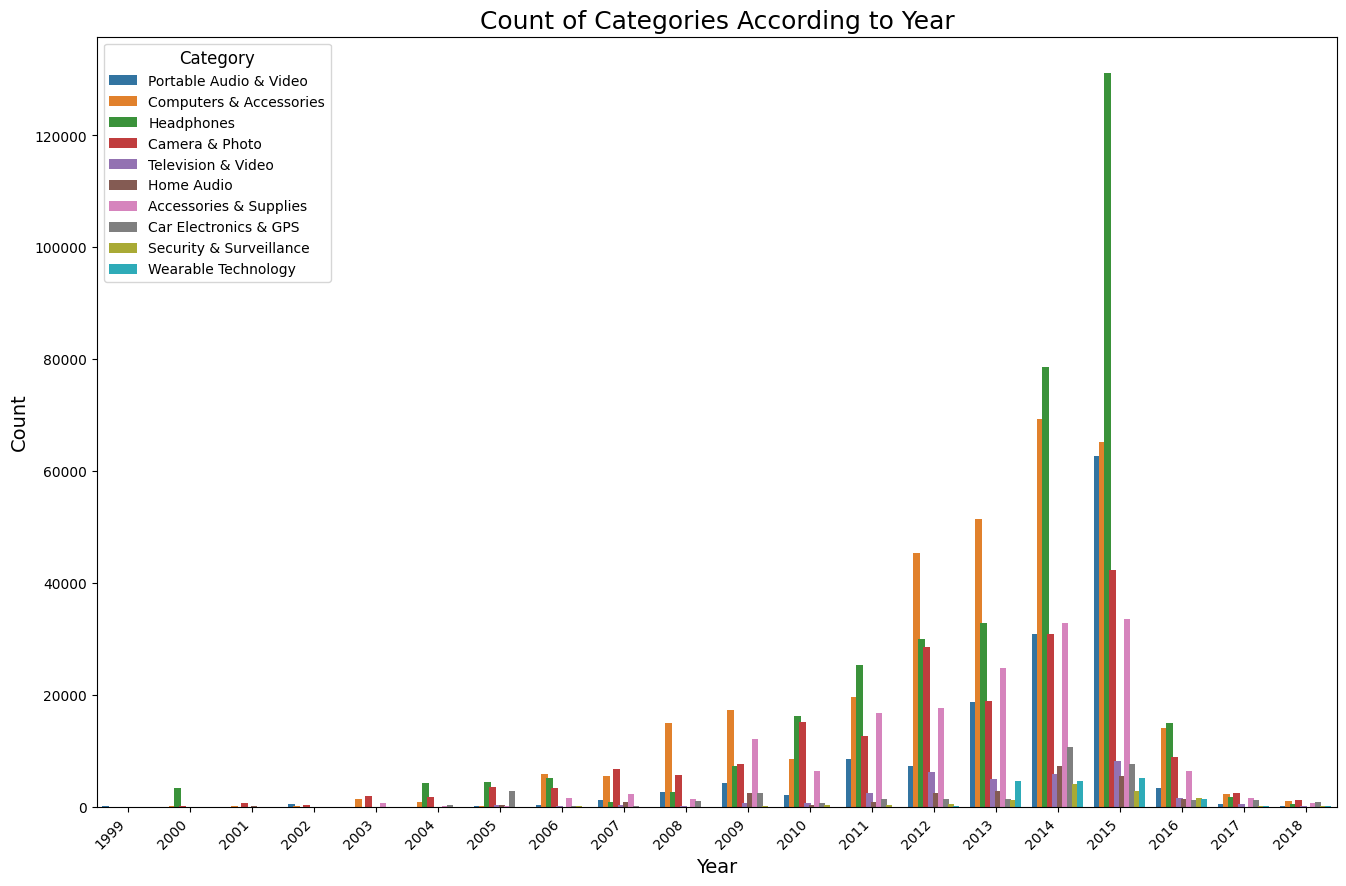

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 10))


ax = sns.countplot(x='year', hue='category', data=df)


bar_width = 0.1  # Adjust this value as needed
for patch in ax.patches:
    current_width = patch.get_width()
    diff = current_width - bar_width

    # Change the bar width
    patch.set_width(bar_width)
    patch.set_x(patch.get_x() + diff * .5)

plt.title('Count of Categories According to Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Category', title_fontsize='12', fontsize='10', loc='upper left')


plt.xticks(rotation=45, ha='right')

plt.show()


C:\Users\CHIRAG\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



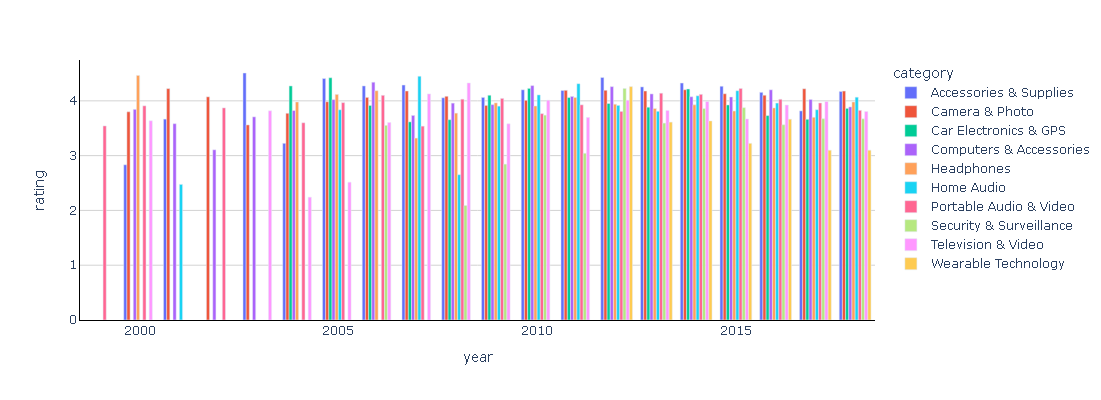

In [142]:
 df4 = highest_rating_in_year


fig = px.bar(df4, x="year", y="rating", color="category", text_auto=False , barmode='group' )
fig.update_layout(height=400,width=1000)
config={"modeBarButtonsToRemove": ['select2d','zoomIn2d','zoomOut2d','zoom2d','pan2d','lasso2d','autoScale2d','resetScale2d','resetScale2d'],'displaylogo': False}

fig.update_layout(
    {
        "paper_bgcolor": "rgba(0, 0, 0, 0)",
        "plot_bgcolor": "rgba(0, 0, 0, 0)",
    }
)

fig.update_xaxes(showticklabels=True)
fig.update_xaxes(showline=True , linecolor='black' )
fig.update_yaxes(showline=True, linecolor='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=True ,gridcolor='lightgrey')
fig.update_xaxes(showticklabels=True)
fig.show(config = config)

## * Which gender tends to buys things ?
## * Which brand has the highest sale ?
## * which month has the highest sale ?
  

In [143]:
gender_wise_analysis =df.groupby('user_attr')['user_id'].count().reset_index()

In [144]:
gender_wise_analysis

,user_attr,user_id
0,Female,647453
1,Male,645501


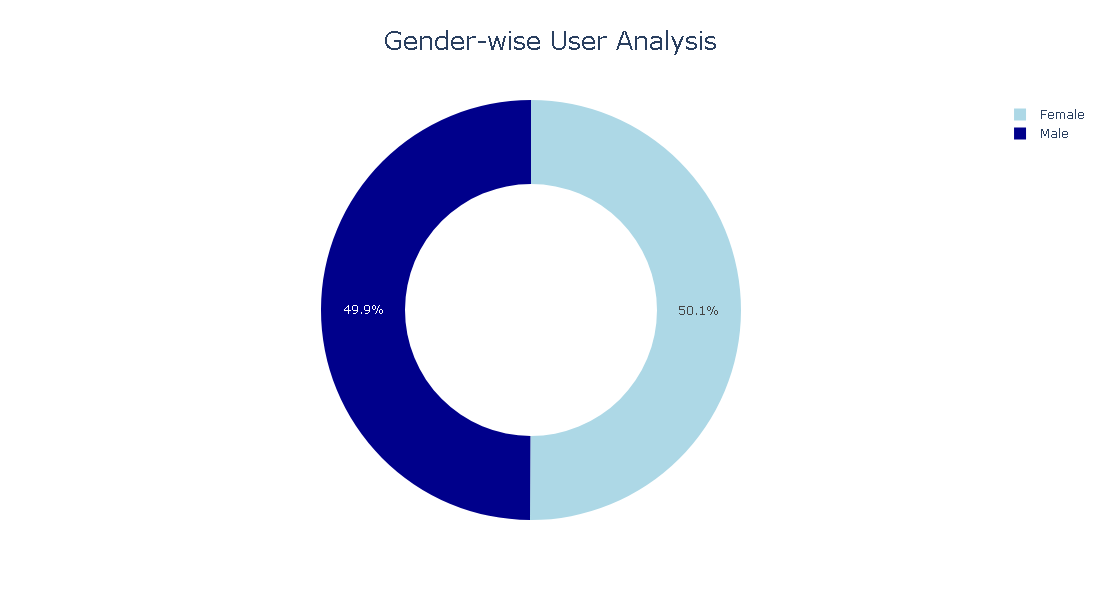

In [166]:
import plotly.graph_objects as go

labels = gender_wise_analysis.user_attr
values = gender_wise_analysis.user_id
color = ['lightblue', 'darkblue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=color, hole=.6)])
fig.update_layout(
    title_text="Gender-wise User Analysis",
    title_x=0.5,  # Center the title
    title_font_size=25)

# Increase the size of the pie chart
fig.update_layout(width=1000, height=600)

fig.show()
fig.write_html("gender_wise_analysis.html", config=config)


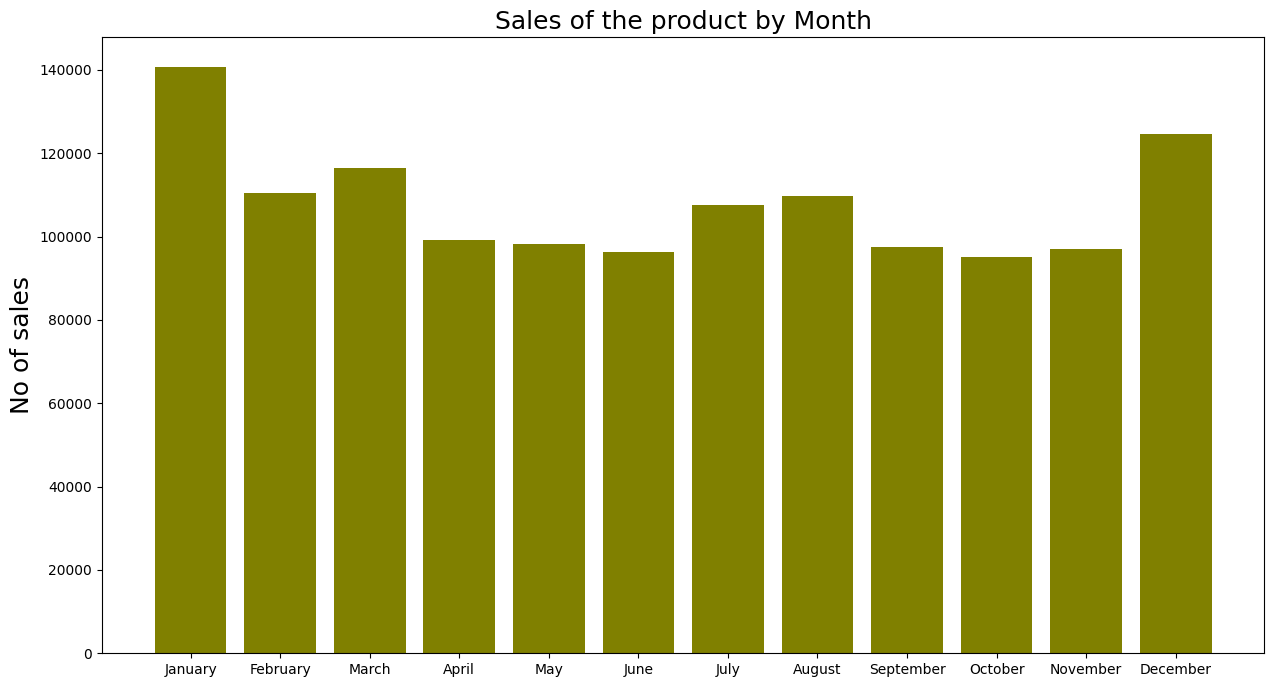

In [153]:
highest_sales_in_month =df.groupby(['month'])['user_id'].count().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

bar_colors = [ 'Olive']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.bar(highest_sales_in_month.month.to_numpy(), highest_sales_in_month.user_id.to_numpy(), color=bar_colors)

ax.set_ylabel('No of sales' , fontsize=18)
ax.set_title('Sales of the product by Month' , fontsize=18)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.xticks([ 1, 2, 3, 4, 5, 6,7,8,9,10,11,12],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

In [157]:
highest_sales_by_brand =df.groupby(['brand'])['user_id'].count().head(15).reset_index()

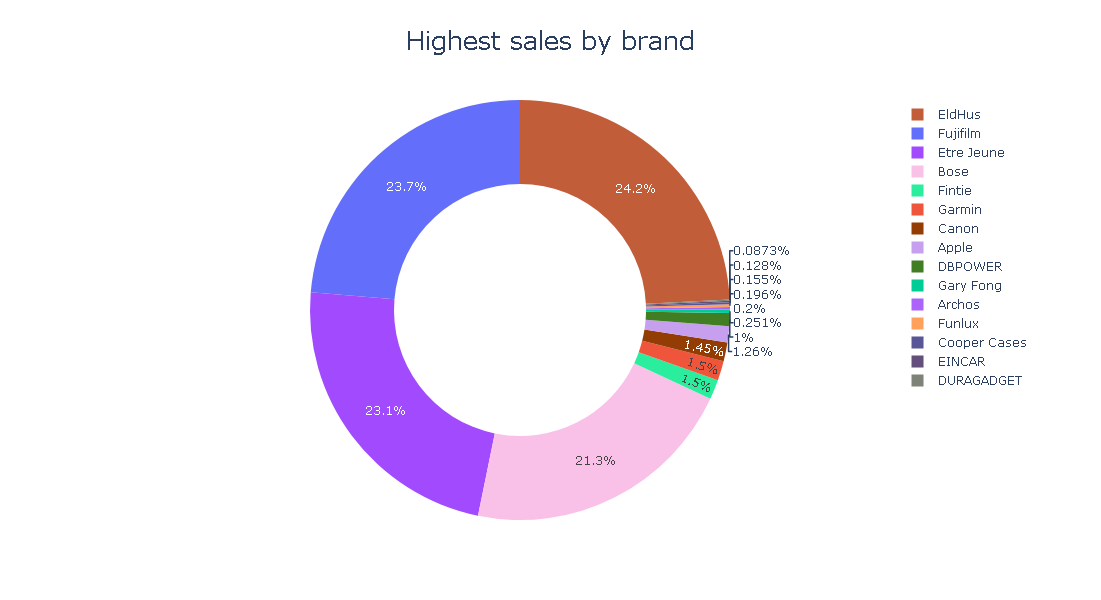

In [165]:
import plotly.graph_objects as go

labels = highest_sales_by_brand.brand
values = highest_sales_by_brand.user_id
color = ['#C79FEF',  'darkblue' '#4E8CA1', '#F9C1E7', '#933D05', '#595697', '#417D22', '#7D8377', '#624F7B', '#C25D39', '#A24AFD', '#2AED9E']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values,marker_colors= color, hole=.6)])
fig.update_layout(
    title_text="Highest sales by brand",
    title_x=0.5,  # Center the title
    title_font_size=25)

fig.update_layout(width=1000, height=600)
fig.show()
fig.write_html("highest_sales_by_brand.html",config= config)

## What products Sold the most in the last three years 2016, 2017 & 2018
## 2016

<Axes: xlabel='brand'>

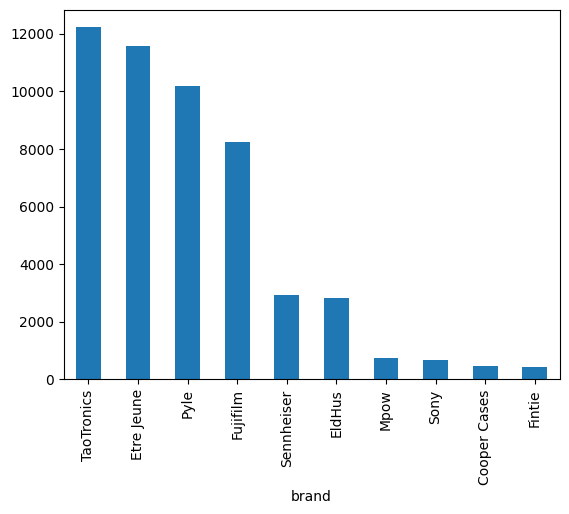

In [170]:
df[df['year']==2016].groupby('brand')['rating'].count().sort_values(ascending = False).head(10).plot(kind='bar')

## 2017

<Axes: xlabel='brand'>

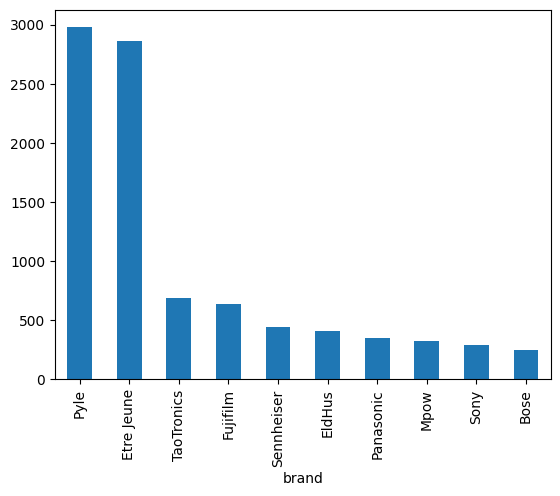

In [172]:
df[df['year']==2017].groupby('brand')['rating'].count().sort_values(ascending = False).head(10).plot(kind='bar')

## 2018

<Axes: xlabel='brand'>

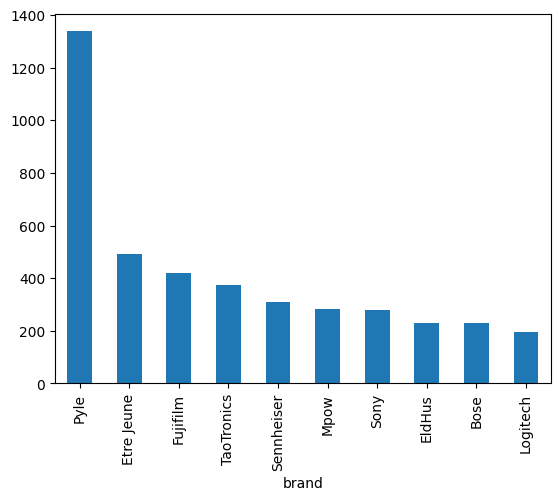

In [173]:
df[df['year']==2018].groupby('brand')['rating'].count().sort_values(ascending = False).head(10).plot(kind='bar')